The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). The main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.head(3).transpose()

,0,1,2
Freq_1,0.02,0.0453,0.0262
Freq_2,0.0371,0.0523,0.0582
Freq_3,0.0428,0.0843,0.1099
Freq_4,0.0207,0.0689,0.1083
Freq_5,0.0954,0.1183,0.0974
...,...,...,...
Freq_57,0.018,0.014,0.0316
Freq_58,0.0084,0.0049,0.0164
Freq_59,0.009,0.0052,0.0095
Freq_60,0.0032,0.0044,0.0078


In [4]:
from sklearn.model_selection import train_test_split
X=df.drop('Label',axis=1)
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipeline = Pipeline(operations)

In [6]:
from sklearn.model_selection import GridSearchCV
knn_values = list(range(1,30))
grid_parameters = {'knn__n_neighbors':knn_values}
model = GridSearchCV(pipeline,grid_parameters,cv=10,scoring='accuracy')
model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [7]:
model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

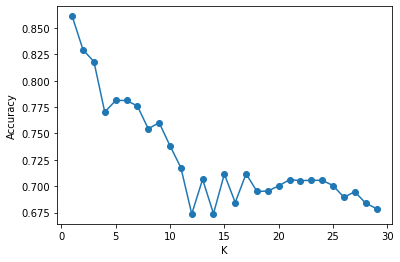

In [8]:
plt.plot(knn_values,model.cv_results_['mean_test_score'],'o-')
plt.xlabel("K")
plt.ylabel("Accuracy");

In [9]:
# Model evaluation
y_predicted = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [10]:
print(confusion_matrix(y_test,y_predicted))

[[12  1]
 [ 1  7]]
